In [118]:
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

In [128]:
LAYERS = range(0, 12)
MODEL = "bert-base-uncased"
STIMULUS = "black" # slumlordreach, black

In [129]:
z_reps = {}
for layer in LAYERS:
    z_reps[layer] = np.load("{}_{}_layer_{}_z_representations.npy".format(STIMULUS, MODEL, layer))

number_of_trs = z_reps[0].shape[0]

In [130]:
# Indexes to slice out individual heads
indices = [x+64 for x in range(0, 768, 64)]
head_indices = list(zip([0]+ indices, indices))

In [131]:
stimulus_responses = []
for i in range(0, number_of_trs):
    z_magnitudes = []
    for layer in LAYERS:
        layer_z_reps = z_reps[layer][i]
#         print(i, layer, layer_z_reps.shape)
        
        for start, end in head_indices:
            attn_head = layer_z_reps[start:end]
#             print(start, end, attn_head.shape)
            z_magnitudes.append(np.linalg.norm(attn_head))
    stimulus_responses.append(z_magnitudes)

In [132]:
z_magnitude_array = np.array(stimulus_responses)
z_magnitude_array.shape

(534, 144)

In [133]:
magnitude_output_file = "{}_{}_zrep_magnitudes.npy".format(STIMULUS, MODEL)
np.save(magnitude_output_file, z_magnitude_array)

In [134]:
SCP_STRING = "scp {} tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/{}/{}/syntactic_analyses"

scp_formatted = SCP_STRING.format(magnitude_output_file, STIMULUS, MODEL)
print(scp_formatted)

scp black_bert-base-uncased_zrep_magnitudes.npy tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/syntactic_analyses


Text(0.5, 0.98, 'Z Magnitudes')

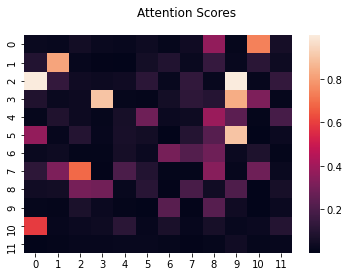

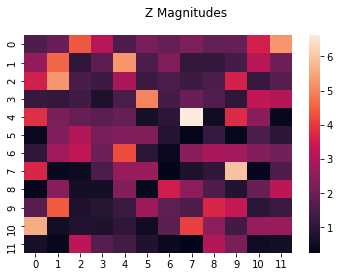

In [147]:
tr_to_compare = 533

attn_scores = np.load("{}_{}_syntactic_complexity_L-inf_T-128_D-bck.npy".format(STIMULUS, MODEL), allow_pickle=True)
attn_square_matrix = np.array(attn_scores[tr_to_compare]).reshape(12,12)
sns.heatmap(attn_square_matrix)
plt.suptitle("Attention Scores")

plt.figure()
z_magnitudes = np.load(magnitude_output_file, allow_pickle=True)
z_square_matrix = np.array(z_magnitudes[tr_to_compare]).reshape(12,12)
sns.heatmap(z_square_matrix)
plt.suptitle("Z Magnitudes")

In [148]:
for i in range(50, 500):
    attn_scores_tr = attn_scores[i]
    if attn_scores_tr is None:
        continue
    
    attn_magnitude = np.linalg.norm(attn_scores_tr)
    zs_magnitude = np.linalg.norm(z_magnitudes[i])
    print("{:.2f} | {:.2f}".format(attn_magnitude, zs_magnitude))
    
    

4.36 | 20.48
4.00 | 20.73
4.13 | 20.12
3.97 | 20.90
3.40 | 23.15
3.72 | 21.40
4.49 | 20.35
3.95 | 21.31
2.96 | 27.60
3.95 | 21.23
3.98 | 19.90
4.09 | 21.21
4.47 | 20.14
3.79 | 19.40
3.18 | 18.50
3.94 | 19.75
3.72 | 22.03
3.87 | 19.97
3.95 | 21.39
4.14 | 20.43
3.69 | 22.37
3.69 | 20.54
3.08 | 20.06
3.92 | 18.92
2.78 | 22.69
3.88 | 19.89
3.44 | 21.75
4.13 | 20.99
3.37 | 23.41
3.61 | 22.32
4.12 | 20.21
3.89 | 21.37
3.49 | 21.63
3.56 | 22.34
3.59 | 18.21
3.74 | 22.95
4.48 | 22.84
3.90 | 19.23
4.57 | 20.90
3.98 | 19.38
3.70 | 20.00
3.94 | 21.61
4.32 | 19.87
3.71 | 22.49
3.62 | 19.79
4.08 | 20.46
3.89 | 20.89
3.02 | 21.32
4.13 | 20.88
3.34 | 20.01
3.64 | 22.74
3.51 | 24.42
4.09 | 23.30
4.09 | 23.30
4.09 | 23.30
4.09 | 23.30
4.09 | 23.30
4.09 | 23.30
4.09 | 23.30
3.43 | 20.21
3.61 | 24.21
3.81 | 21.76
3.60 | 18.71
4.12 | 21.24
4.40 | 20.20
4.23 | 22.10
4.13 | 20.69
3.29 | 24.49
4.38 | 19.61
3.73 | 21.77
3.28 | 22.27
3.34 | 22.69
3.90 | 21.12
3.90 | 21.12
2.29 | 22.81
3.51 | 21.56
3.22 | 20.47